# Predictive D1 Retention

## Data Preprocessing

In [ ]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Dataset Import
dataset = pd.read_csv('/content/drive/MyDrive/Python/Predictive-D1-Retention-New/Predictive D1 Retention Data Set.csv')

In [ ]:
dataset.head()

,install_date,player_id,country,device_type,game_ver,retained,level_cohort,total_players,players_1_character_equipped,players_3_character_equipped,players_story_mode_played,players_beginner_mode_played,players_games_started,players_placed_unit,players_levelup_unit,players_upgraded_character,players_battles_won,players_banner_popup,players_greenman_played,players_qsb_pressed,players_character_summoned
0,2022-08-12,3758487507,VN,Desktop,15906,0,0-14,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2022-08-07,2997781905,DK,Desktop,15906,0,0-14,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2022-08-06,3244341043,KR,Desktop,15905,0,0-14,1,1,1,0,0,0,0,0,0,0,0,0,0,0
3,2022-08-06,3733817657,US,Mobile,15906,0,0-14,1,1,1,1,1,1,1,0,0,0,0,1,1,0
4,2022-08-12,3359507241,TH,Mobile,15906,0,0-14,1,1,1,1,1,1,1,0,0,0,0,1,1,0


In [ ]:
# drop the total_players column
dataset = dataset.drop(columns = "total_players")

In [ ]:
# Data Explanatory
dataset.describe()

,player_id,game_ver,retained,players_1_character_equipped,players_3_character_equipped,players_story_mode_played,players_beginner_mode_played,players_games_started,players_placed_unit,players_levelup_unit,players_upgraded_character,players_battles_won,players_banner_popup,players_greenman_played,players_qsb_pressed,players_character_summoned
count,1.034130e+05,103413.000000,103413.000000,103413.000000,103413.000000,103413.000000,103413.000000,103413.000000,103413.000000,103413.000000,103413.000000,103413.000000,103413.000000,103413.000000,103413.000000,103413.000000
mean,3.064556e+09,15938.515196,0.156789,0.724203,0.693220,0.423583,0.411786,0.479398,0.489735,0.319631,0.170008,0.322696,0.397581,0.411786,0.467001,0.343245
std,1.021857e+09,76.638296,0.363603,0.446917,0.461159,0.494128,0.492159,0.499578,0.499897,0.466336,0.375641,0.467510,0.489400,0.492159,0.498912,0.474795
min,9.757300e+04,15793.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.712455e+09,15906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.601254e+09,15906.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.779042e+09,16047.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,3.808391e+09,16058.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Check columns with nulls and data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103413 entries, 0 to 103412
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   install_date                  103413 non-null  object
 1   player_id                     103413 non-null  int64 
 2   country                       103410 non-null  object
 3   device_type                   102937 non-null  object
 4   game_ver                      103413 non-null  int64 
 5   retained                      103413 non-null  int64 
 6   level_cohort                  103413 non-null  object
 7   players_1_character_equipped  103413 non-null  int64 
 8   players_3_character_equipped  103413 non-null  int64 
 9   players_story_mode_played     103413 non-null  int64 
 10  players_beginner_mode_played  103413 non-null  int64 
 11  players_games_started         103413 non-null  int64 
 12  players_placed_unit           103413 non-null  int64 
 13 

In [ ]:
# Null Values
dataset.isna().any()

install_date                    False
player_id                       False
country                          True
device_type                      True
game_ver                        False
retained                        False
level_cohort                    False
players_1_character_equipped    False
players_3_character_equipped    False
players_story_mode_played       False
players_beginner_mode_played    False
players_games_started           False
players_placed_unit             False
players_levelup_unit            False
players_upgraded_character      False
players_battles_won             False
players_banner_popup            False
players_greenman_played         False
players_qsb_pressed             False
players_character_summoned      False
dtype: bool

In [ ]:
#Unique values in each categorical variable:
dataset["country"].nunique()
dataset["country"].unique()
dataset["device_type"].nunique()
dataset["device_type"].unique()

array(['Desktop', 'Mobile', 'Console', nan], dtype=object)

In [ ]:
# Distribution of the variable to predict
dataset["retained"].value_counts()

0    87199
1    16214
Name: retained, dtype: int64

In [ ]:
## Changing Data type
dataset = dataset.astype({
    'player_id': 'object',
    'game_ver': 'object',
    'retained': 'object',
    'players_1_character_equipped': 'object',
    'players_3_character_equipped': 'object',
    'players_story_mode_played': 'object',
    'players_beginner_mode_played': 'object',
    'players_games_started': 'object',
    'players_placed_unit': 'object',
    'players_levelup_unit': 'object',
    'players_upgraded_character': 'object',
    'players_battles_won': 'object',
    'players_banner_popup': 'object',
    'players_greenman_played': 'object',
    'players_qsb_pressed': 'object',
    'players_character_summoned': 'object'
    })

In [ ]:
dataset.dtypes

install_date                    object
player_id                       object
country                         object
device_type                     object
game_ver                        object
retained                        object
level_cohort                    object
players_1_character_equipped    object
players_3_character_equipped    object
players_story_mode_played       object
players_beginner_mode_played    object
players_games_started           object
players_placed_unit             object
players_levelup_unit            object
players_upgraded_character      object
players_battles_won             object
players_banner_popup            object
players_greenman_played         object
players_qsb_pressed             object
players_character_summoned      object
dtype: object

## Data Evaluation

In [ ]:
dataset.head()

,install_date,player_id,country,device_type,game_ver,retained,level_cohort,players_1_character_equipped,players_3_character_equipped,players_story_mode_played,players_beginner_mode_played,players_games_started,players_placed_unit,players_levelup_unit,players_upgraded_character,players_battles_won,players_banner_popup,players_greenman_played,players_qsb_pressed,players_character_summoned
0,2022-08-12,3758487507,VN,Desktop,15906,0,0-14,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2022-08-07,2997781905,DK,Desktop,15906,0,0-14,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2022-08-06,3244341043,KR,Desktop,15905,0,0-14,1,1,0,0,0,0,0,0,0,0,0,0,0
3,2022-08-06,3733817657,US,Mobile,15906,0,0-14,1,1,1,1,1,1,0,0,0,0,1,1,0
4,2022-08-12,3359507241,TH,Mobile,15906,0,0-14,1,1,1,1,1,1,0,0,0,0,1,1,0


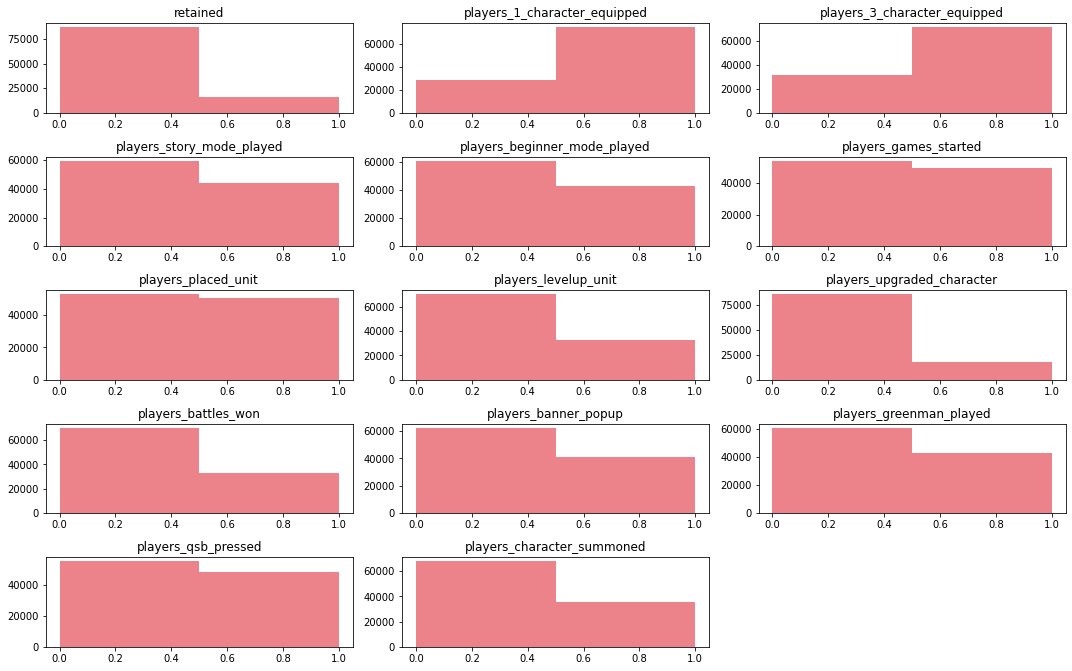

In [ ]:
#Histogram of Numerical Columns

dataset2 = dataset[['retained','players_1_character_equipped', 'players_3_character_equipped',
'players_story_mode_played', 'players_beginner_mode_played','players_games_started','players_placed_unit',
'players_levelup_unit','players_upgraded_character','players_battles_won','players_banner_popup','players_greenman_played','players_qsb_pressed',
'players_character_summoned']]


# dataset2 = dataset[['players_character_summoned']]

#Histogram:
    
fig = plt.figure(figsize=(15, 12))
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
      vals = 100
    
    plt.hist(dataset2.iloc[:, i], bins=vals, color = '#ec838a')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


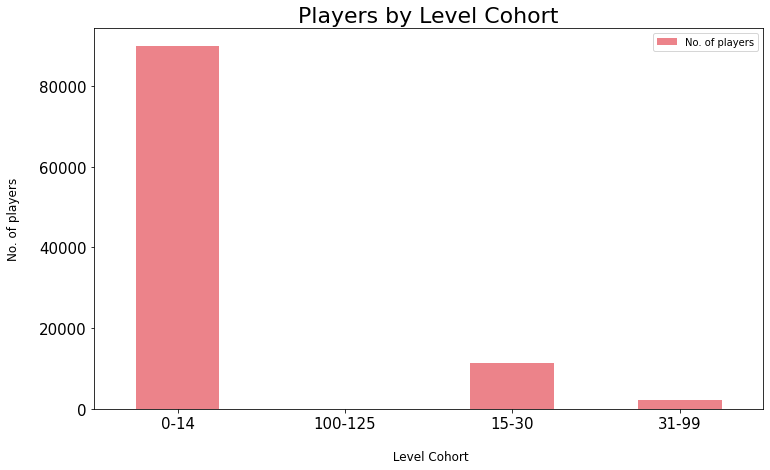

In [ ]:
# Histogram of Categorical Column Level Cohort

column_split = dataset[[ "player_id", "level_cohort"]]
column_name = 'Level Cohort'
sectors = column_split .groupby ("level_cohort")
column_split = pd.DataFrame(sectors["player_id"].count())
column_split.rename(columns={'player_id':'No. of players'}, inplace=True)
ax =  column_split[["No. of players"]].plot.bar(title = 'Players by '+ column_name,legend =True, table = False, 
grid = False,  subplots = False,figsize =(12, 7), color ='#ec838a', 
fontsize = 15, stacked=False)
plt.ylabel('No. of players\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n ' + column_name,
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.title('Players by ' + column_name,
horizontalalignment="center",fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
x_labels = np.array(column_split[["No. of players"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


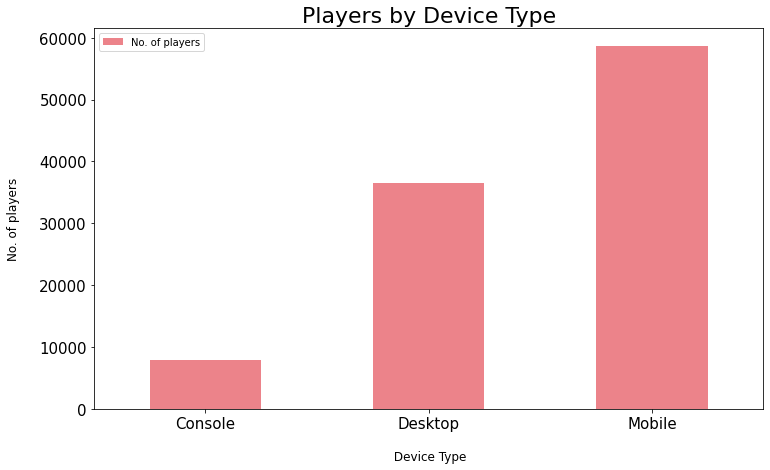

In [ ]:
# Histogram of Categorical Column Device Type

column_split = dataset[[ "player_id", "device_type"]]
column_name = 'Device Type'
sectors = column_split .groupby ("device_type")
column_split = pd.DataFrame(sectors["player_id"].count())
column_split.rename(columns={'player_id':'No. of players'}, inplace=True)
ax =  column_split[["No. of players"]].plot.bar(title = 'Players by '+ column_name,legend =True, table = False, 
grid = False,  subplots = False,figsize =(12, 7), color ='#ec838a', 
fontsize = 15, stacked=False)
plt.ylabel('No. of players\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n ' + column_name,
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.title('Players by ' + column_name,
horizontalalignment="center",fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
x_labels = np.array(column_split[["No. of players"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


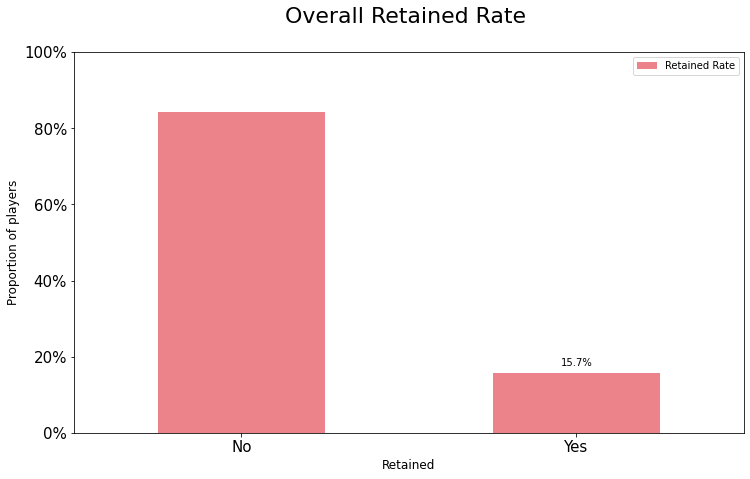

In [ ]:
# Retained Rate

import matplotlib.ticker as mtick
retained_rate = dataset[["retained", "player_id"]]
retained_rate ["retained_label"] = pd.Series(
np.where((retained_rate["retained"] == 0), "No", "Yes"))
sectors = retained_rate .groupby ("retained_label")
retained_rate = pd.DataFrame(sectors["player_id"].count())
retained_rate ["Retained Rate"] = (
retained_rate ["player_id"]/ sum(retained_rate ["player_id"]) )*100
ax =  retained_rate[["Retained Rate"]].plot.bar(title = 'Overall Retained Rate',legend =True, table = False,grid = False,  subplots = False, 
figsize =(12, 7), color = '#ec838a', fontsize = 15, stacked=False, 
ylim =(0,100))
plt.ylabel('Proportion of players',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Retained',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Overall Retained Rate \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
x_labels = np.array(retained_rate[["player_id"]])
def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:     
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing
        va = 'bottom'        
        if y_value < 0:           
            space *= -1          
            va = 'top'
        label = "{:.1f}%".format(y_value)    
 
    ax.annotate(label,
              (x_value, y_value),         
              xytext=(0, space),
              textcoords="offset points", 
              ha='center',va=va)
add_value_labels(ax)
ax.autoscale(enable=False, axis='both', tight=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


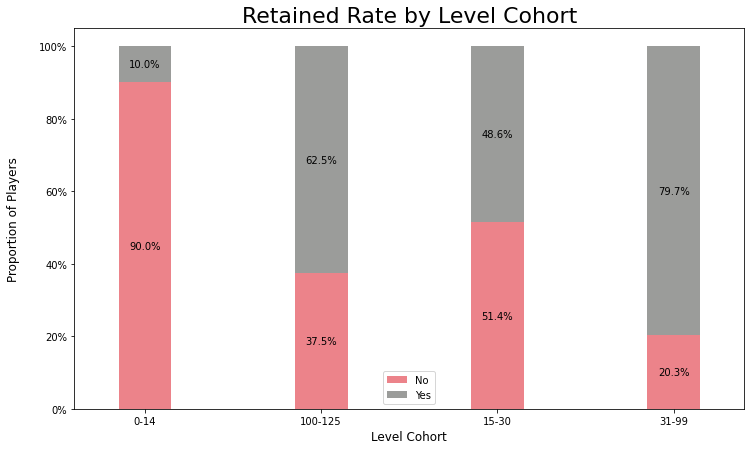

In [ ]:
# Retained Rate By Level Cohort

import matplotlib.ticker as mtick

column_name = 'Level Cohort'

column_retained =dataset.groupby(['level_cohort','retained']).size().unstack()
column_retained.rename(
columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ['#ec838a','#9b9c9a']
ax = (column_retained.T*100.0 / column_retained.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)
plt.ylabel('Proportion of Players\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel(column_name + '\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Retained Rate by '+ column_name,
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


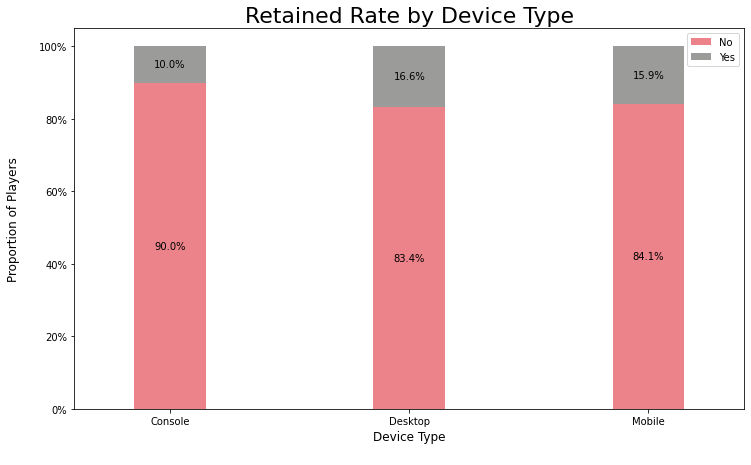

In [ ]:
# Retained Rate By Device Type

import matplotlib.ticker as mtick

column_name = 'Device Type'

column_retained =dataset.groupby(['device_type','retained']).size().unstack()
column_retained.rename(
columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ['#ec838a','#9b9c9a']
ax = (column_retained.T*100.0 / column_retained.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)
plt.ylabel('Proportion of Players\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel(column_name + '\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Retained Rate by '+ column_name,
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

In [ ]:
# This step is not necessary, but i was learning how to do a mapping :)

dataset['retained_categories'] = dataset['retained'].map({1 :'Yes', 0:'No'})

In [ ]:
dataset.head()

,install_date,player_id,country,device_type,game_ver,retained,level_cohort,players_1_character_equipped,players_3_character_equipped,players_story_mode_played,players_beginner_mode_played,players_games_started,players_placed_unit,players_levelup_unit,players_upgraded_character,players_battles_won,players_banner_popup,players_greenman_played,players_qsb_pressed,players_character_summoned,retained_categories
0,2022-08-12,3758487507,VN,Desktop,15906,0,0-14,0,0,0,0,0,0,0,0,0,0,0,0,0,No
1,2022-08-07,2997781905,DK,Desktop,15906,0,0-14,0,0,0,0,0,0,0,0,0,0,0,0,0,No
2,2022-08-06,3244341043,KR,Desktop,15905,0,0-14,1,1,0,0,0,0,0,0,0,0,0,0,0,No
3,2022-08-06,3733817657,US,Mobile,15906,0,0-14,1,1,1,1,1,1,0,0,0,0,1,1,0,No
4,2022-08-12,3359507241,TH,Mobile,15906,0,0-14,1,1,1,1,1,1,0,0,0,0,1,1,0,No


In [ ]:
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique values

le_count = 0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

15 columns were label encoded.


In [ ]:
# Correlations

dataset2 = dataset[['level_cohort','device_type','game_ver',
       'players_3_character_equipped', 'players_1_character_equipped','players_story_mode_played',
       'players_beginner_mode_played','players_games_started','players_placed_unit','players_levelup_unit',
       'players_upgraded_character','players_battles_won','players_banner_popup','players_greenman_played','players_qsb_pressed',
       'players_character_summoned']]

correlations = dataset2.corrwith(dataset.retained)
correlations = correlations[correlations!=1]
positive_correlations = correlations[
correlations >0].sort_values(ascending = False)
negative_correlations =correlations[
correlations<0].sort_values(ascending = False)

print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 players_banner_popup            0.341955
players_battles_won             0.325551
players_levelup_unit            0.324928
players_character_summoned      0.318250
players_placed_unit             0.286405
players_games_started           0.282734
players_story_mode_played       0.271373
players_upgraded_character      0.263974
players_beginner_mode_played    0.251940
players_greenman_played         0.251940
players_qsb_pressed             0.248515
players_3_character_equipped    0.198392
players_1_character_equipped    0.193030
dtype: float64

Most Negative Correlations: 
 Series([], dtype: float64)


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

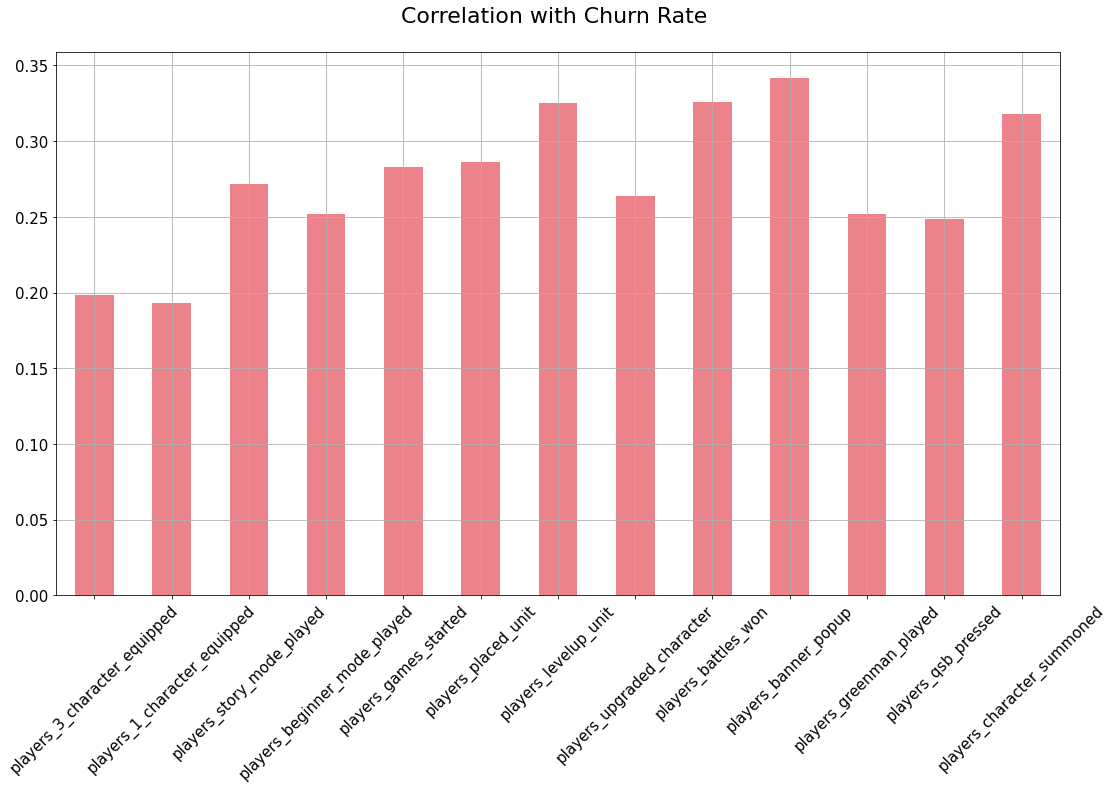

In [ ]:
correlations = dataset2.corrwith(dataset.retained)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

Interestingly, all the game events are positively correlated.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


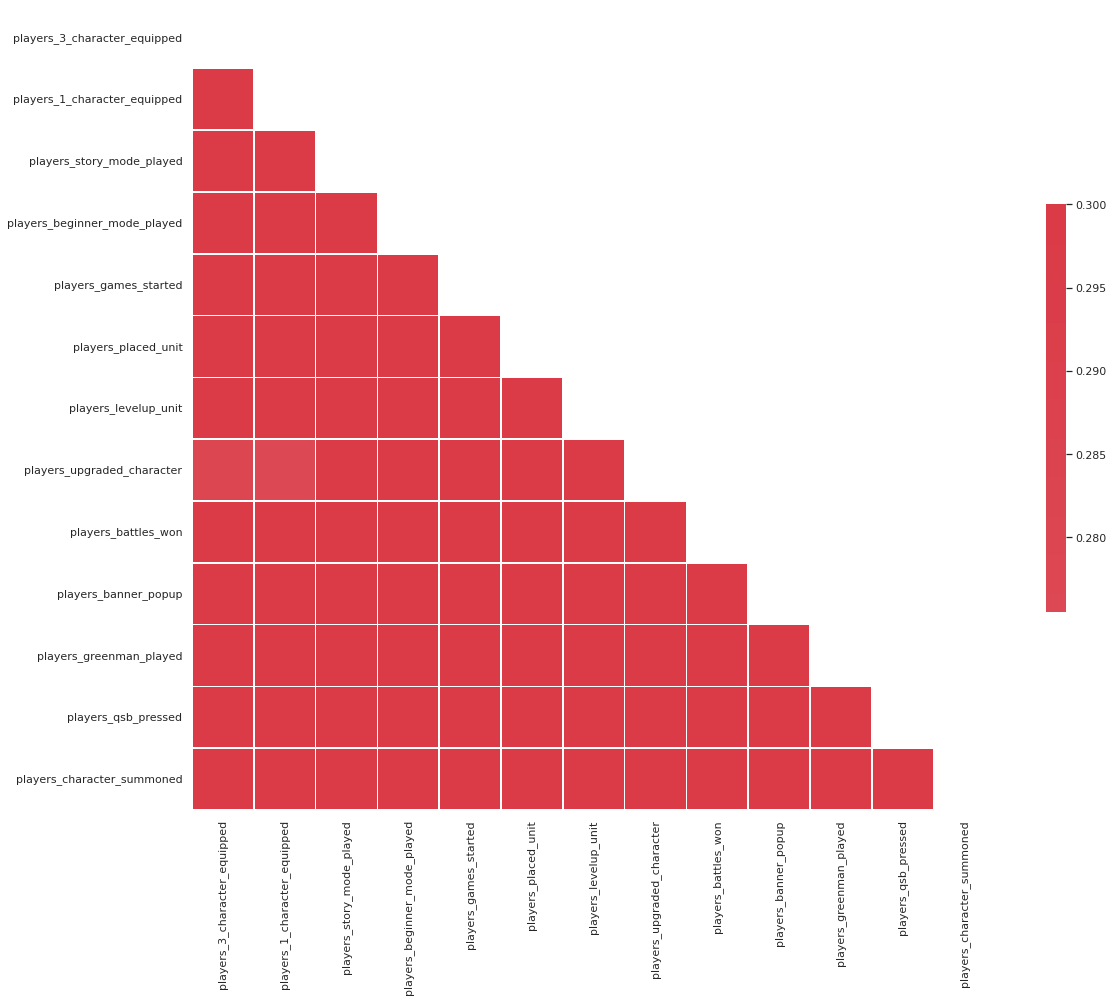

In [ ]:
## Correlation Matrix

#Set and compute the Correlation Matrix:
sn.set(style="white")
corr = dataset2.corr()
#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio:
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Model Selection

In [ ]:
# Drop the columns that are not needed for the prediction

dataset = dataset.drop(columns = "country")
dataset = dataset.drop(columns = "game_ver")
dataset = dataset.drop(columns = "install_date")
dataset = dataset.drop(columns = "retained_categories")

In [ ]:
dataset.head()

,player_id,device_type,retained,level_cohort,players_1_character_equipped,players_3_character_equipped,players_story_mode_played,players_beginner_mode_played,players_games_started,players_placed_unit,players_levelup_unit,players_upgraded_character,players_battles_won,players_banner_popup,players_greenman_played,players_qsb_pressed,players_character_summoned
0,3758487507,Desktop,0,0-14,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2997781905,Desktop,0,0-14,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3244341043,Desktop,0,0-14,1,1,0,0,0,0,0,0,0,0,0,0,0
3,3733817657,Mobile,0,0-14,1,1,1,1,1,1,0,0,0,0,1,1,0
4,3359507241,Mobile,0,0-14,1,1,1,1,1,1,0,0,0,0,1,1,0


In [ ]:
#Incase if player_id is an object:
    
identity = dataset["player_id"]
dataset = dataset.drop(columns="player_id")
#Convert rest of categorical variable into dummy:
dataset= pd.get_dummies(dataset)
#Rejoin userid to dataset:
dataset = pd.concat([dataset, identity], axis = 1)

In [ ]:
#Identify response variable:
    
response = dataset["retained"]
dataset = dataset.drop(columns="retained")

In [ ]:
dataset.head()

,players_1_character_equipped,players_3_character_equipped,players_story_mode_played,players_beginner_mode_played,players_games_started,players_placed_unit,players_levelup_unit,players_upgraded_character,players_battles_won,players_banner_popup,players_greenman_played,players_qsb_pressed,players_character_summoned,device_type_Console,device_type_Desktop,device_type_Mobile,level_cohort_0-14,level_cohort_100-125,level_cohort_15-30,level_cohort_31-99,player_id
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,3758487507
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2997781905
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,3244341043
3,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,3733817657
4,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,3359507241


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset, response,stratify=response, test_size = 0.2, random_state = 0)
#to resolve any class imbalance - use stratify parameter.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (82730, 21)
Number transactions y_train dataset:  (82730,)
Number transactions X_test dataset:  (20683, 21)
Number transactions y_test dataset:  (20683,)


In [ ]:
# Remove Identifiers
train_identity = X_train['player_id']
X_train = X_train.drop(columns = ['player_id'])
test_identity = X_test['player_id']
X_test = X_test.drop(columns = ['player_id'])

In [ ]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [ ]:
def get_score (model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  return model.score(X_test,y_test)

In [ ]:
get_score(LogisticRegression(),X_train,X_test,y_train,y_test)

0.8592563941401151

In [ ]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))
# models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
# models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
# models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
# models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=3)
# accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(  
    model, X_train, y_train, cv=kfold, scoring='accuracy')
#  roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(  
    model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,80.73,0.09,75.23,0.04
2,Random Forest,79.96,0.16,85.97,0.12
1,Decision Tree Classifier,79.53,0.29,85.97,0.10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


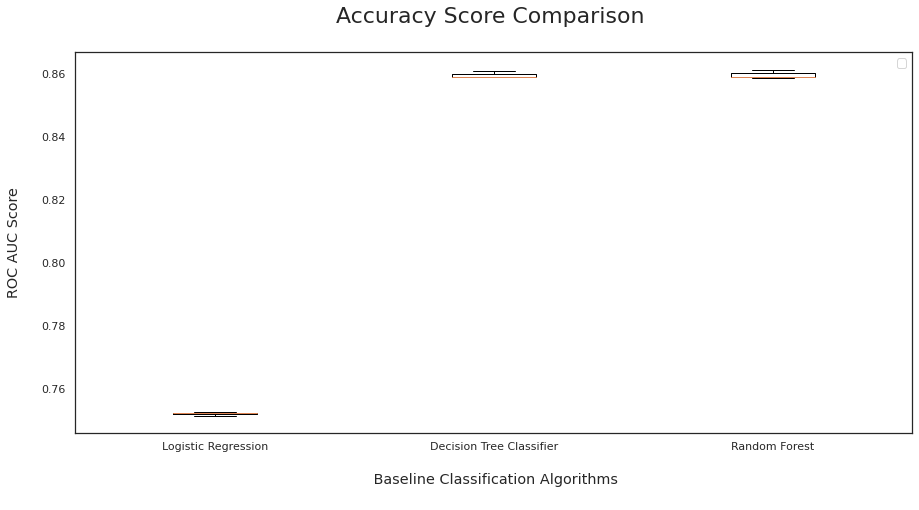

In [ ]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
#
plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
#
plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.title('Accuracy Score Comparison \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
#
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  app.launch_new_instance()


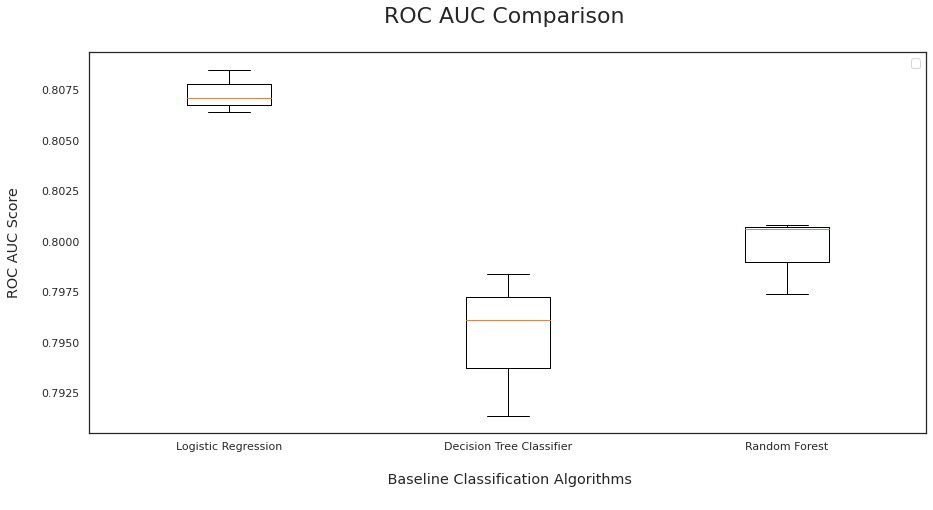

In [ ]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
#
plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal",
fontsize = "large", fontfamily = "sans-serif")
#
plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
#
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [ ]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression', 
acc, prec, rec, f1, f2]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.859256   0.625948  0.254394  0.361763  0.288663


In [ ]:
# Fitting Decision Tree to the Training set:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Decision Tree', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)


                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.859256   0.625948  0.254394  0.361763  0.288663
1        Decision Tree  0.859837   0.596197  0.328708  0.423773  0.361111


In [ ]:
# Fitting Random Forest to the Training set:
    
classifier = RandomForestClassifier(n_estimators = 72, 
criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
from sklearn.metrics import confusion_matrix
accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Random Forest', 
acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)


                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.859256   0.625948  0.254394  0.361763  0.288663
1        Decision Tree  0.859837   0.596197  0.328708  0.423773  0.361111
2        Random Forest  0.859933   0.596004  0.331175  0.425768  0.363476


**Although the Random Forest model is the best, relatively highest combination of accuracy, recall, and F2 scores; giving the greatest number of correct positive predictions and minimizing false negatives, in this case I chose to learn how to implement the logistic regression model since it is easier to interpret and thus be able to see how each variable influences within the model.**



## Model Evaluation

In [ ]:
classifier = LogisticRegression(random_state = 0,
penalty = 'l2')
classifier.fit(X_train, y_train)
# Predict the Test set results
y_pred = classifier.predict(X_test)
#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression',
acc, prec, rec, f1, f2]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.859256   0.625948  0.254394  0.361763  0.288663


In [ ]:
accuracies = cross_val_score(estimator = classifier,X = X_train, y = y_train, cv = 10)
print("Logistic Regression Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Logistic Regression Classifier Accuracy: 0.86 (+/- 0.00)


Text(0.5, 12.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

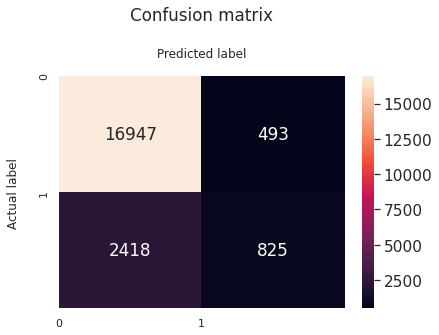

In [ ]:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

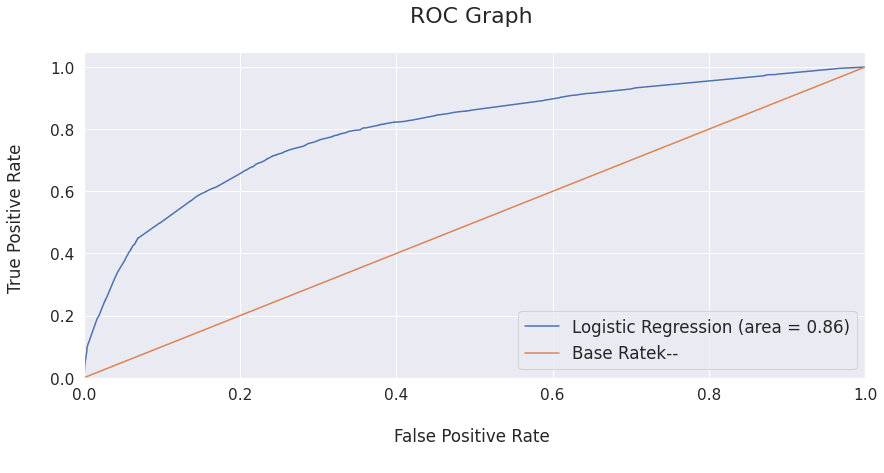

In [ ]:
classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))
# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, 
label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [ ]:
# Analyzing Coefficients
feature_importances = pd.concat([
pd.DataFrame(dataset.drop(columns = 'player_id').
columns, columns = ["features"]),
pd.DataFrame(np.transpose(classifier.coef_), 
columns = ["coef"])],axis = 1)
feature_importances.sort_values("coef", ascending = False)

,features,coef
9,players_banner_popup,0.459582
19,level_cohort_31-99,0.257886
6,players_levelup_unit,0.171176
18,level_cohort_15-30,0.141697
4,players_games_started,0.137361
0,players_1_character_equipped,0.117890
8,players_battles_won,0.106211
5,players_placed_unit,0.077413
11,players_qsb_pressed,0.074381
7,players_upgraded_character,0.031908


**That the player fires the player_banner_popup event and that he reaches a level between 31 and 99 on his first day of play, has a positive impact on the retention to D1**


[[16947   493]
 [ 2418   825]]
Test Data Accuracy: 0.8593


<Figure size 2016x1440 with 0 Axes>

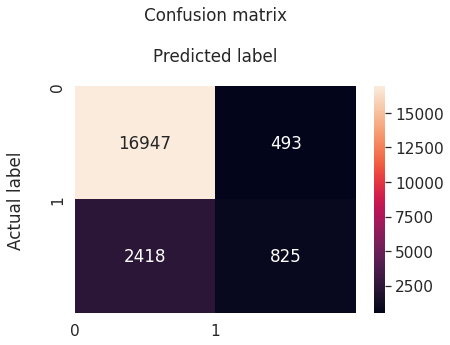

In [ ]:
#Revalidate final results with Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
print (cm)
#Confusion Matrix as a quick Crosstab:
    
pd.crosstab(y_test,pd.Series(y_pred),
rownames=['ACTUAL'],colnames=['PRED'])
#visualize Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [ ]:
final_results = pd.concat([test_identity, y_test], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results["propensity_to_retain(%)"] = y_pred
final_results["propensity_to_retain(%)"] = final_results["propensity_to_retain(%)"]*100
final_results["propensity_to_retain(%)"]=final_results["propensity_to_retain(%)"].round(2)
final_results = final_results[['player_id', 'retained', 'predictions', 'propensity_to_retain(%)']]
final_results ['Ranking'] = pd.qcut(final_results['propensity_to_retain(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
print (final_results)

        player_id  retained  predictions  propensity_to_retain(%) Ranking
19219  3537693157         0            0                        0      10
11463  3716593342         0            0                        0      10
85600  3190343548         0            0                        0      10
81721  2979111672         0            0                        0      10
43493  3352898440         0            0                        0      10
...           ...       ...          ...                      ...     ...
10318  3678575412         0            0                        0       1
8590   3805387080         0            0                        0       1
6192   3778542138         1            0                        0       1
90061  3075744353         0            0                        0       1
73318  2438672558         1            0                        0       1

[20683 rows x 5 columns]


In [ ]:
# Save Model
filename = '/content/drive/MyDrive/Python/Predictive-D1-Retention-New/final_model.model'
i = [classifier]
joblib.dump(i,filename)

['/content/drive/MyDrive/Python/Predictive-D1-Retention-New/final_model.model']